### **Name:** *`Urooj Fatima`*  
### **DHC-ID:** `DHC-29`   
### **Domain:** *`AI/ML Engineering Internship Tasks`*  
# **`DevelopersHub Corporation`**  

# 📌 Task 2: Auto Tagging Support Tickets Using LLM  

## 🧠 Problem Statement
Organizations often receive a high volume of customer support tickets, written in free text and describing various issues such as billing problems, login errors, or technical glitches. Manually reading and tagging these tickets into categories (e.g., Billing, Authentication, Connectivity, etc.) is time-consuming, inconsistent, and not scalable.

## 🚀 Objective
Automatically tag support tickets into categories using a large language model (LLM).

## 📂 Dataset
Free-text Support Ticket Dataset with columns:
- `support_query`: The text description of the issue raised by the customer.
- `resolution_tag`: The assigned category/label.


In [3]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace with your own CSV)
data = pd.DataFrame({
    'support_query': [
        'Internet is not working since yesterday',
        'Unable to login to my account',
        'I was double charged for my subscription',
        'The mobile app keeps crashing',
        'Need help resetting my password'
    ],
    'resolution_tag': [
        'Connectivity',
        'Authentication',
        'Billing',
        'App Issue',
        'Authentication'
    ]
})
data

,support_query,resolution_tag
0,Internet is not working since yesterday,Connectivity
1,Unable to login to my account,Authentication
2,I was double charged for my subscription,Billing
3,The mobile app keeps crashing,App Issue
4,Need help resetting my password,Authentication


## Zero-shot Classification

In [5]:
# Candidate labels (update with your dataset categories)
candidate_labels = ['Connectivity', 'Authentication', 'Billing', 'App Issue']

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def get_top3_tags(text):
    result = classifier(text, candidate_labels, multi_label=True)
    return result['labels'][:3]

data['predicted_tags'] = data['support_query'].apply(get_top3_tags)
data[['support_query','predicted_tags']]


Device set to use cpu


,support_query,predicted_tags
0,Internet is not working since yesterday,"[Connectivity, Billing, Authentication]"
1,Unable to login to my account,"[Connectivity, Authentication, App Issue]"
2,I was double charged for my subscription,"[Billing, Connectivity, App Issue]"
3,The mobile app keeps crashing,"[App Issue, Connectivity, Authentication]"
4,Need help resetting my password,"[Authentication, Connectivity, App Issue]"


## Evaluation (if ground truth labels are available)

                precision    recall  f1-score   support

     App Issue       1.00      1.00      1.00         1
Authentication       1.00      0.50      0.67         2
       Billing       1.00      1.00      1.00         1
  Connectivity       0.50      1.00      0.67         1

      accuracy                           0.80         5
     macro avg       0.88      0.88      0.83         5
  weighted avg       0.90      0.80      0.80         5



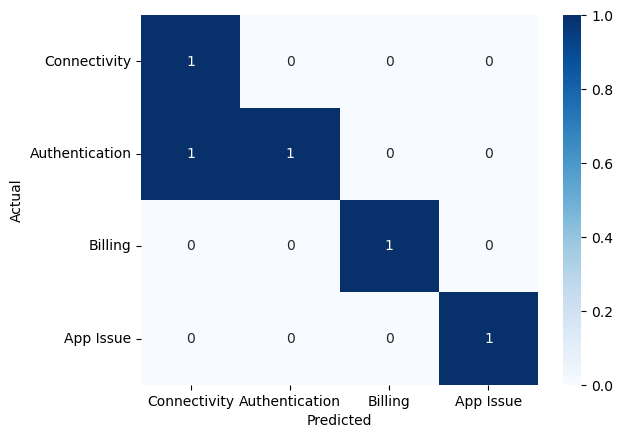

In [7]:
# For evaluation, take top-1 prediction
data['predicted_top1'] = data['predicted_tags'].apply(lambda x: x[0] if len(x) > 0 else None)

print(classification_report(data['resolution_tag'], data['predicted_top1']))

# Confusion matrix
cm = confusion_matrix(data['resolution_tag'], data['predicted_top1'], labels=candidate_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=candidate_labels, yticklabels=candidate_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Final Summary
- Implemented **zero-shot classification** using BART-MNLI.
- Extracted **top-3 probable tags** per support query.
- Added evaluation with precision/recall/F1 and confusion matrix.
- This notebook can be extended with **few-shot learning** or **fine-tuning**.